# Unbalanced Optimal Transport

**Optimal Transport**

Let $M$ is the cost distance, with $M_{i,j} = |x_i - y_j|^2$, for $x_i, y_j \in \mathbb{R}^d$.
Let $W_2(a,b)$ be the Wasserstein distance between two vectors $a$ and $b$ with positive entries:
$$W_2^2(a,b) = \min_\gamma <\gamma,M>_F, \\
\text{s.t. } \gamma 1 = a, \ \gamma^T 1 = b. \text{(marginal and mass equivalent)}$$
Linear optimization, heavy in computation.

Dual Problem:
$$\sup_{\alpha, \beta} \alpha^T a + \beta^T b, \quad \text{s.t. } \alpha_i + \beta_j \leq M_{i,j}$$
Gradient:
It can be shown that in the optimal point $(\gamma^*, \alpha^*, \beta^*)$, $\alpha^*$ is a subgradient of $W_2(a,b)$ w.r.t $a$.


**Sinkhorn distance**
$$S_2^2(a,b) = \min_\gamma <\gamma,M>_F + reg\cdot\Omega(\gamma). \\
\text{s.t. } \gamma 1 = a, \ \gamma^T 1 = b.$$
Here $\Omega$ is Kullback–Leibler divergence as a regularization term. Here $\Omega(\gamma) = \sum \gamma_{i,j} \log(\gamma_{i,j})$, and it is convex.
The Sinkhorn distance can be computed by a matrix scaling algorithom.

Gradient:
Similar to the optimal transport problem, we can also have a dual problem. Suppose $(\gamma^*, \alpha^*, \beta^*)$ is the optimal point, is $\alpha^*$ is a subgradient of $S_2$ or close to the gradient of $S_2$? (NEED TO CHECK)

**Unbalanced OT**

In this section we test the unbalanced optimal transport problem with the python package.

$$\hat{W}_2^2(a,b) = \min_\gamma <\gamma,M>_F + reg\cdot\Omega(\gamma) + reg_m KL(\gamma 1, a) + reg_m KL(\gamma^T 1, b)$$

Here,
$$KL(\gamma 1, a) = \sum_i (\gamma 1)_i \log(\frac{(\gamma 1)_i}{a_i})$$

Gradient:
What is the gradient or subgradient?

In [1]:
using PyPlot
using PyCall
using LinearAlgebra

include("code/sinkhorn.jl")
ot = pyimport("ot")

function gauss_func(t, b, c)
    y = exp.(-(t.-b).^2 ./ (2*c^2));
    return y
end

function sin_func(t, omega, phi)
    return sin.(2*pi*omega*(t .- phi));
end

function ricker_func(t, t0, sigma)
    t = t.-t0;
    f = (1 .- t.^2 ./ sigma.^2) .* exp.(- t.^2 ./ (2 .* sigma.^2));
    return f
end

N = 101
x = range(0, stop=1, length=N)
M = cost_func_1d(N);

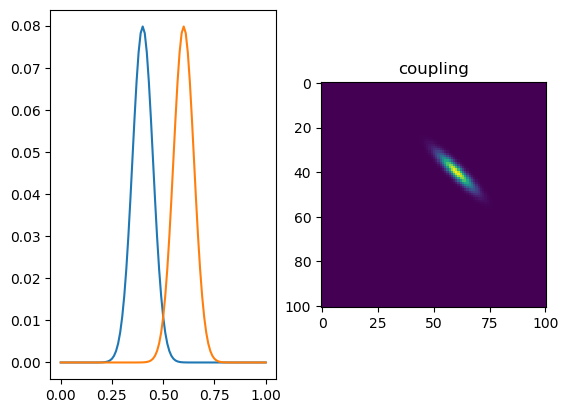

PyObject Text(0.5, 1, 'coupling')

In [2]:
r = gauss_func(x, 0.4, 0.05)
c = gauss_func(x, 0.6, 0.05)
r = r ./ norm(r,1)
c = c ./ norm(c,1)

Gs = ot.sinkhorn(r, c, M, 1e-3, verbose=true, stopThr=1e-9)
figure
subplot(121); plot(x,r,x,c)
subplot(122); imshow(Gs); title("coupling")

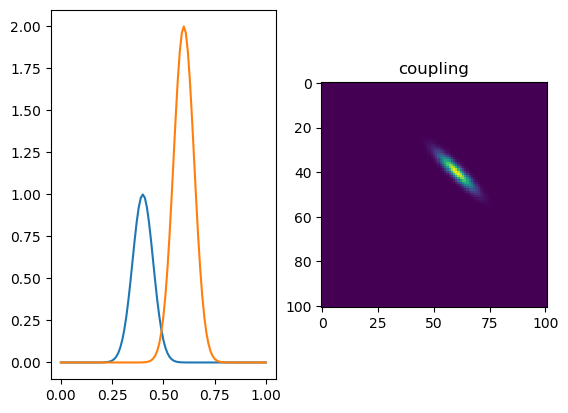

PyObject Text(0.5, 1, 'coupling')

In [3]:
r = gauss_func(x, 0.4, 0.05)
c = 2*gauss_func(x, 0.6, 0.05)

G = ot.unbalanced.sinkhorn_unbalanced(r, c, M, 1e-3, 1e1, verbose=false)
figure
subplot(121); plot(x,r,x,c)
subplot(122); imshow(G); title("coupling")

In [4]:
time_shift = 0.4:0.01:0.6
amp_shift = 0.5:0.01:1.5

n = length(time_shift)
m = length(amp_shift)
misfit = zeros(n,m)

c = gauss_func(x, 0.5, 0.1)

for i = 1:n
    for j = 1:m
        r = amp_shift[j] .* gauss_func(x, time_shift[i], 0.1)
        G = ot.unbalanced.sinkhorn_unbalanced(r, c, M, 1e-3, 1e1, verbose=false)
        misfit[i,j] = sum(G .* M)
    end
end

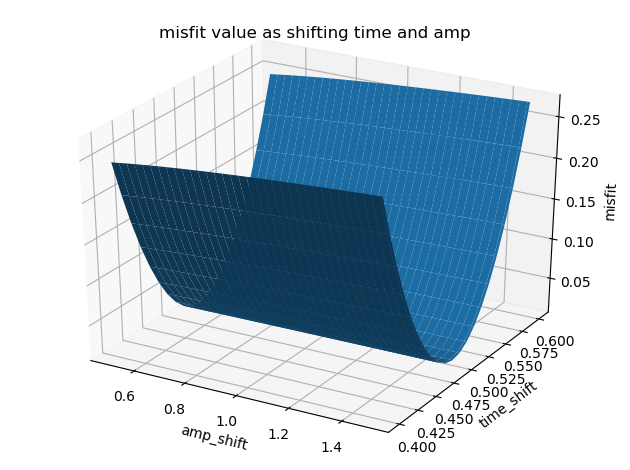

In [5]:
surf(amp_shift,time_shift,misfit)
xlabel("amp_shift")
ylabel("time_shift")
zlabel("misfit")
title("misfit value as shifting time and amp")
tight_layout()

In [6]:
amp_shift = 0.5:0.02:1.5

m = length(amp_shift)
misfit = zeros(m)

c = gauss_func(x, 0.5, 0.1)

for j = 1:m
    r = amp_shift[j] .* gauss_func(x, 0.6, 0.1)
    G = ot.unbalanced.sinkhorn_unbalanced(r, c, M, 1e-3, 1e1, verbose=false)
    misfit[j] = sum(G .* M)
end


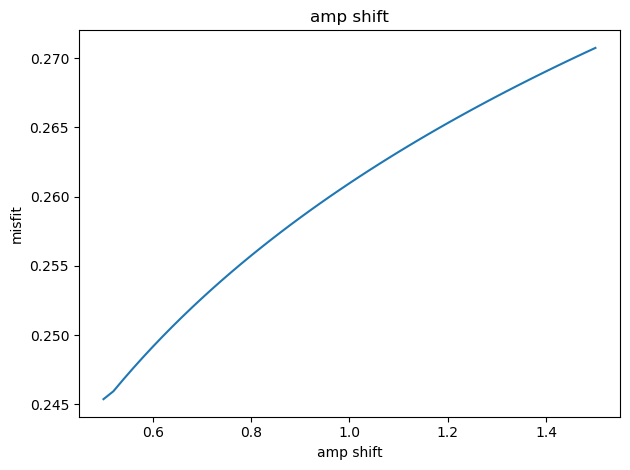

In [7]:
plot(amp_shift, misfit)
title("amp shift")
xlabel("amp shift")
ylabel("misfit")
tight_layout()